In [4]:
# import library
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

#  Hide all warnings
import warnings
warnings.filterwarnings("ignore")

# Import graphviz
import graphviz

In [5]:
def load_data(data_directory):
    directories = [d for d in os .listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images =[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        
        file_names = [os.path.join(label_directory, f)
            for f in os.listdir(label_directory)]
        
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

# Designing a MLP in Python and Keras code

In [6]:
train_data_path = os.path.join(os.getcwd(),"dataset","training")
test_data_path = os.path.join(os.getcwd(),"dataset","testing")
images, labels = load_data(train_data_path)
test_images,test_labels = load_data(test_data_path)
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

In [7]:
train_images,validation_images,train_labels,validation_labels = train_test_split(images, labels, train_size=0.8, test_size=0.2,random_state=0)
print(train_images.shape,train_labels.shape,validation_images.shape,validation_labels.shape,test_images.shape,test_labels.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,) (10000, 28, 28) (10000,)


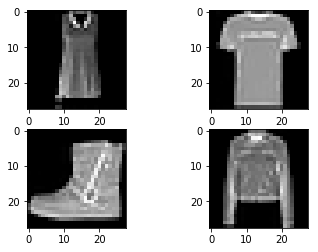

In [8]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [9]:
# Convert images from 2D array format to 1D
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],
num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],
num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [10]:
# Normalize images to get higher speed with range 0-1
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [11]:
# Convert the labels from string to numeric 
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

In [12]:
# Create a model
model = Sequential()
model.add(Dense(350, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 94us/step - loss: 0.4942 - acc: 0.8245 - val_loss: 0.4375 - val_acc: 0.8458
Epoch 2/5
48000/48000 [==============================] - 4s 88us/step - loss: 0.3724 - acc: 0.8646 - val_loss: 0.4015 - val_acc: 0.8509
Epoch 3/5
48000/48000 [==============================] - 4s 90us/step - loss: 0.3357 - acc: 0.8773 - val_loss: 0.3697 - val_acc: 0.8684
Epoch 4/5
48000/48000 [==============================] - 4s 88us/step - loss: 0.3080 - acc: 0.8861 - val_loss: 0.3559 - val_acc: 0.8652
Epoch 5/5
48000/48000 [==============================] - 4s 88us/step - loss: 0.2874 - acc: 0.8933 - val_loss: 0.3202 - val_acc: 0.8840


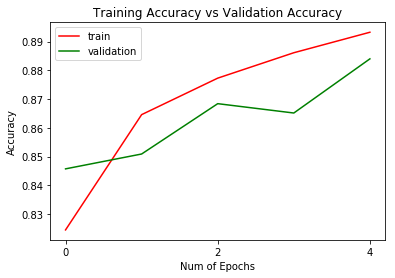

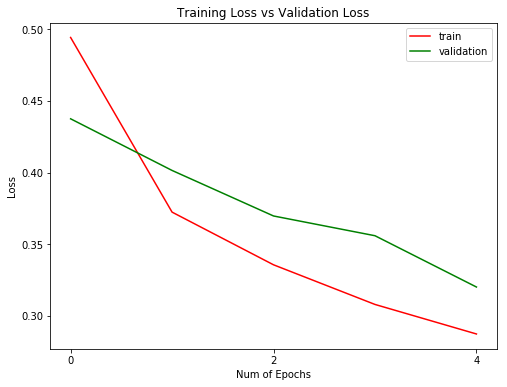

In [13]:
# Train the model and indicate model`s performance
history = model.fit(train_images, train_labels,
validation_data=(validation_images,validation_labels), epochs=5)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']
#  Draw a graph to compare train and validation accuracy through five epochs
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [14]:
# from ann_visualizer.visualize import ann_viz;
# ann_viz(model, title="My first neural network")

In [15]:
# Test the trained model on a test set of 10K images
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 12.58%
MLP Accuracy on test set: 87.42%


In [16]:
# Implement cross-validation
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(images, temp_labels):
    # create model
    model = Sequential()
    model.add(Dense(350, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])
    # Fit the model
    model.fit(images[train], labels[train], epochs=1, verbose=0)
    # evaluate the model
    scores = model.evaluate(images[test], labels[test], verbose=0)
    print("-------------------------------------------------------")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cv_acc.append(scores[1] * 100)
    cv_error.append(100-scores[1] * 100)
    print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
    np.std(cv_acc)))
    print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
    np.std(cv_error)))
    scores = model.evaluate(test_images, test_labels, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

-------------------------------------------------------
acc: 85.82%
Cross Validation Accuracy 85.82% (+/- 0.00%)
Cross Validation Error 14.18% (+/- 0.00%)
MLP Error on test set: 14.63%
MLP Accuracy on test set: 85.37%
-------------------------------------------------------
acc: 85.45%
Cross Validation Accuracy 85.63% (+/- 0.18%)
Cross Validation Error 14.37% (+/- 0.18%)
MLP Error on test set: 14.57%
MLP Accuracy on test set: 85.43%
-------------------------------------------------------
acc: 85.35%
Cross Validation Accuracy 85.54% (+/- 0.20%)
Cross Validation Error 14.46% (+/- 0.20%)
MLP Error on test set: 16.14%
MLP Accuracy on test set: 83.86%
-------------------------------------------------------
acc: 85.72%
Cross Validation Accuracy 85.58% (+/- 0.19%)
Cross Validation Error 14.42% (+/- 0.19%)
MLP Error on test set: 14.39%
MLP Accuracy on test set: 85.61%
-------------------------------------------------------
acc: 85.03%
Cross Validation Accuracy 85.47% (+/- 0.28%)
Cross Validatio

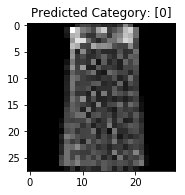

In [17]:
import random
image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)
plt.subplot(221)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title("Predicted Category: "+str(random_label))
plt.show()

# Experimenting with a single-split of the data set

In [18]:
#  Re-read the file
images_single, labels_single = load_data(train_data_path)
test_images_single,test_labels_single = load_data(test_data_path)
images_single = np.asarray(images_single)
test_images_single = np.asarray(test_images_single)
labels_single = np.asarray(labels_single)
test_labels_single = np.asarray(test_labels_single)

In [19]:
# Split data in different ratio ( 90:10) 
train_single_images,validation_single_images,train_single_labels,validation_single_labels = train_test_split(images_single, labels_single, train_size=0.9, test_size=0.1,random_state=0)
print(train_single_images.shape,train_single_labels.shape,validation_single_images.shape,validation_single_labels.shape,test_images_single.shape,test_labels_single.shape)

(54000, 28, 28) (54000,) (6000, 28, 28) (6000,) (10000, 28, 28) (10000,)


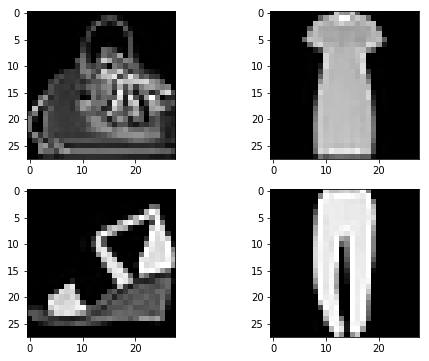

In [20]:
# Plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_single_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_single_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_single_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_single_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [21]:
# Convert images from 2D array format to 1D
num_pixels_single = train_single_images.shape[1] * train_single_images.shape[2]
train_single_images = train_single_images.reshape(train_single_images.shape[0],
num_pixels).astype('float32')
validation_single_images = validation_single_images.reshape(validation_single_images.shape[0],
num_pixels).astype('float32')
test_images_single = test_images_single.reshape(test_images.shape[0], num_pixels).astype('float32')

# Normalize images to get higher speed with range 0-1
train_single_images = train_single_images/255
validation_single_images = validation_single_images/255
test_images_single = test_images_single/255

# Convert the labels from string to numeric 
train_single_labels = np_utils.to_categorical(train_single_labels)
validation_single_labels = np_utils.to_categorical(validation_single_labels)
test_labels_single = np_utils.to_categorical(test_labels_single)
num_classes = train_single_labels.shape[1]

### 10 epoch without Early Stopping

Run 1: Nodes = 78
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 72us/step - loss: 0.5160 - acc: 0.8203 - val_loss: 0.4188 - val_acc: 0.8482
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.3907 - acc: 0.8590 - val_loss: 0.3818 - val_acc: 0.8630
Epoch 3/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.3524 - acc: 0.8736 - val_loss: 0.3808 - val_acc: 0.8627
Epoch 4/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.3312 - acc: 0.8787 - val_loss: 0.3543 - val_acc: 0.8698
Epoch 5/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.3109 - acc: 0.8842 - val_loss: 0.3441 - val_acc: 0.8810
Epoch 6/10
54000/54000 [==============================] - 3s 54us/step - loss: 0.2980 - acc: 0.8896 - val_loss: 0.3339 - val_acc: 0.8755
Epoch 7/10
54000/54000 [==============================] - 3s 57us/step 

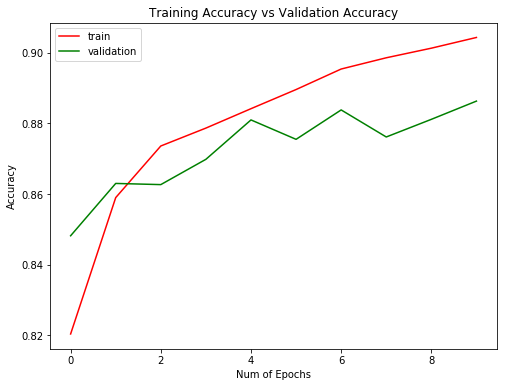

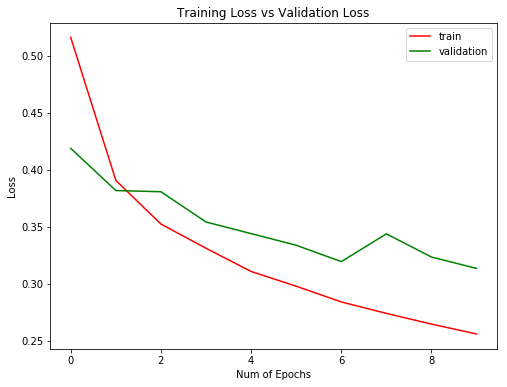

Run 2: Nodes = 254
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.4899 - acc: 0.8264 - val_loss: 0.3955 - val_acc: 0.8608
Epoch 2/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.3718 - acc: 0.8655 - val_loss: 0.3557 - val_acc: 0.8680
Epoch 3/10
54000/54000 [==============================] - 4s 80us/step - loss: 0.3342 - acc: 0.8771 - val_loss: 0.3459 - val_acc: 0.8723
Epoch 4/10
54000/54000 [==============================] - 4s 80us/step - loss: 0.3075 - acc: 0.8858 - val_loss: 0.3270 - val_acc: 0.8842
Epoch 5/10
54000/54000 [==============================] - 5s 84us/step - loss: 0.2898 - acc: 0.8935 - val_loss: 0.3270 - val_acc: 0.8822
Epoch 6/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.2759 - acc: 0.8976 - val_loss: 0.3167 - val_acc: 0.8837
Epoch 7/10
54000/54000 [==============================] - 4s 83us/step

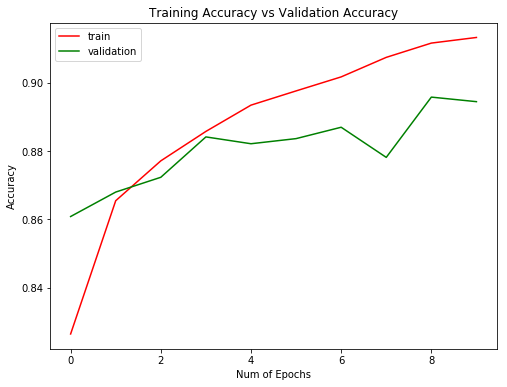

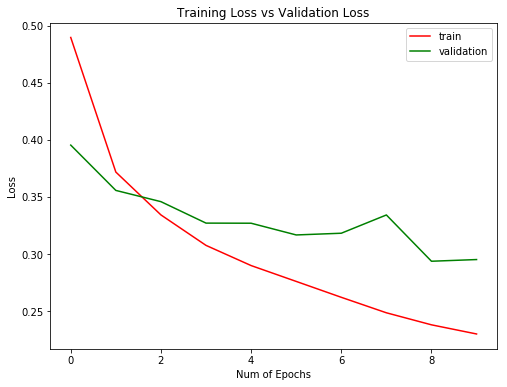

Run 3: Nodes = 430
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 133us/step - loss: 0.4850 - acc: 0.8276 - val_loss: 0.4015 - val_acc: 0.8562
Epoch 2/10
54000/54000 [==============================] - 7s 122us/step - loss: 0.3624 - acc: 0.8686 - val_loss: 0.3825 - val_acc: 0.8642
Epoch 3/10
54000/54000 [==============================] - 7s 126us/step - loss: 0.3281 - acc: 0.8784 - val_loss: 0.3278 - val_acc: 0.8832
Epoch 4/10
54000/54000 [==============================] - 8s 142us/step - loss: 0.3035 - acc: 0.8871 - val_loss: 0.3620 - val_acc: 0.8578
Epoch 5/10
54000/54000 [==============================] - 8s 148us/step - loss: 0.2825 - acc: 0.8952 - val_loss: 0.3189 - val_acc: 0.8845
Epoch 6/10
54000/54000 [==============================] - 8s 139us/step - loss: 0.2694 - acc: 0.8996 - val_loss: 0.3223 - val_acc: 0.8845
Epoch 7/10
54000/54000 [==============================] - 8s 146

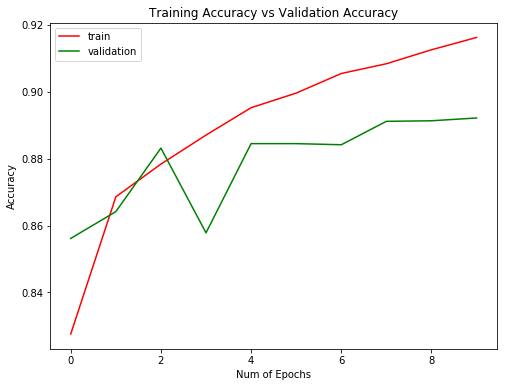

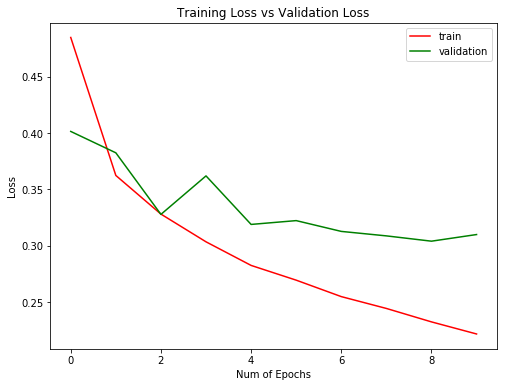

Run 4: Nodes = 606
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 182us/step - loss: 0.4808 - acc: 0.8292 - val_loss: 0.3971 - val_acc: 0.8542
Epoch 2/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.3632 - acc: 0.8673 - val_loss: 0.3674 - val_acc: 0.8640
Epoch 3/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.3277 - acc: 0.8797 - val_loss: 0.3949 - val_acc: 0.8563
Epoch 4/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.3017 - acc: 0.8889 - val_loss: 0.3279 - val_acc: 0.8765
Epoch 5/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.2836 - acc: 0.8936 - val_loss: 0.3180 - val_acc: 0.8822
Epoch 6/10
54000/54000 [==============================] - 11s 200us/step - loss: 0.2693 - acc: 0.9008 - val_loss: 0.3275 - val_acc: 0.8853
Epoch 7/10
54000/54000 [==============================] - 10s 

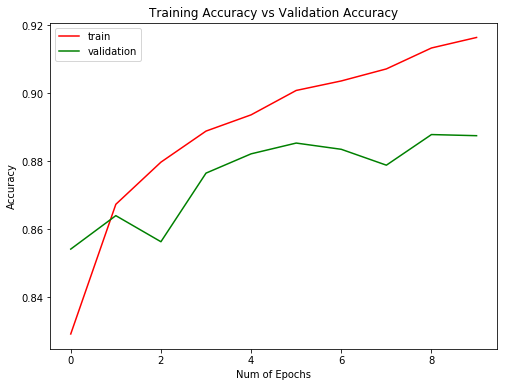

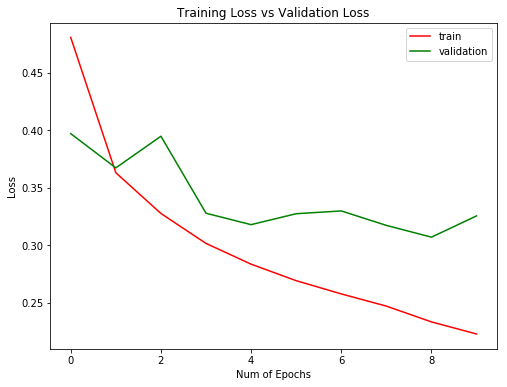

Run 5: Nodes = 784
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 266us/step - loss: 0.4822 - acc: 0.8279 - val_loss: 0.4586 - val_acc: 0.8293
Epoch 2/10
54000/54000 [==============================] - 12s 223us/step - loss: 0.3631 - acc: 0.8678 - val_loss: 0.3751 - val_acc: 0.8622
Epoch 3/10
54000/54000 [==============================] - 15s 281us/step - loss: 0.3238 - acc: 0.8815 - val_loss: 0.3902 - val_acc: 0.8520
Epoch 4/10
54000/54000 [==============================] - 13s 234us/step - loss: 0.3010 - acc: 0.8884 - val_loss: 0.3212 - val_acc: 0.8828
Epoch 5/10
54000/54000 [==============================] - 13s 237us/step - loss: 0.2809 - acc: 0.8961 - val_loss: 0.3109 - val_acc: 0.8872
Epoch 6/10
54000/54000 [==============================] - 15s 274us/step - loss: 0.2655 - acc: 0.9000 - val_loss: 0.3198 - val_acc: 0.8823
Epoch 7/10
54000/54000 [==============================] - 

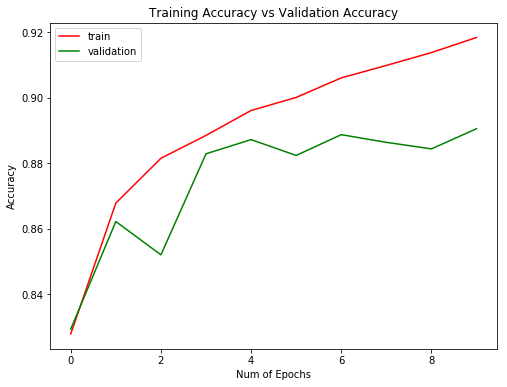

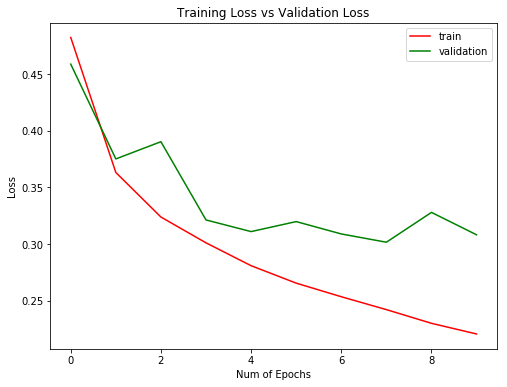

In [23]:
# Testing model with number of nodes in hidden layer from 78 to 784
list_nodes = [78, 254, 430, 606, 784]
i = 1

for node in list_nodes:
    print("Run {0}: Nodes = {1}".format(i, node))
    print("---------------------------------------")
    model = Sequential()
    model.add(Dense(node, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(train_single_images, 
                        train_single_labels,
                        validation_data=(validation_single_images,validation_single_labels), 
                        epochs=10)
    
    training_accuracy = history.history['acc']
    validation_accuracy = history.history['val_acc']
    training_error = history.history['loss']
    validation_error = history.history['val_loss']
    #  Draw a graph to compare train and validation accuracy through five epochs
    plt.figure(0)
    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
    plt.figure(1)
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
    plt.show()
    i=i+1 

### 10 epoch with Early Stopping

Run 1: Nodes = 78
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 67us/step - loss: 0.5220 - acc: 0.8181 - val_loss: 0.4112 - val_acc: 0.8528
Epoch 2/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.3906 - acc: 0.8604 - val_loss: 0.3863 - val_acc: 0.8587
Epoch 3/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.3507 - acc: 0.8720 - val_loss: 0.3623 - val_acc: 0.8653
Epoch 4/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.3281 - acc: 0.8807 - val_loss: 0.3626 - val_acc: 0.8698


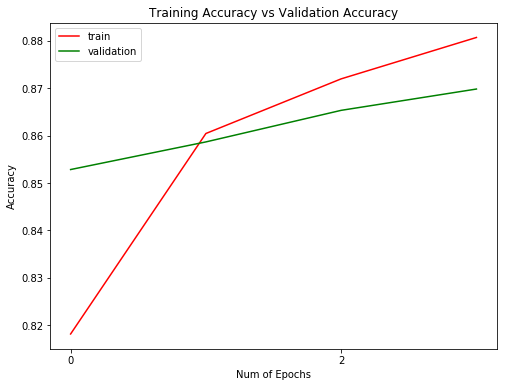

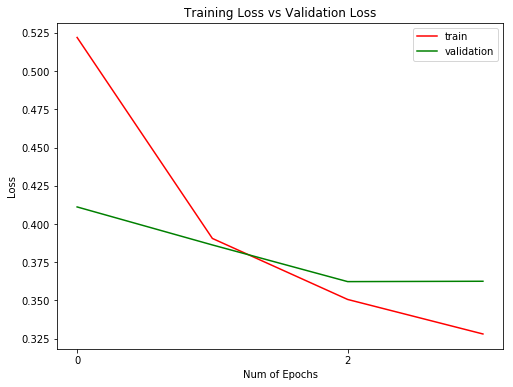

Run 2: Nodes = 254
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.4935 - acc: 0.8252 - val_loss: 0.4080 - val_acc: 0.8518
Epoch 2/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.3707 - acc: 0.8656 - val_loss: 0.3615 - val_acc: 0.8697
Epoch 3/10
54000/54000 [==============================] - 5s 90us/step - loss: 0.3338 - acc: 0.8777 - val_loss: 0.3365 - val_acc: 0.8745
Epoch 4/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.3066 - acc: 0.8880 - val_loss: 0.3324 - val_acc: 0.8790
Epoch 5/10
54000/54000 [==============================] - 5s 91us/step - loss: 0.2894 - acc: 0.8938 - val_loss: 0.3312 - val_acc: 0.8837
Epoch 6/10
54000/54000 [==============================] - 6s 103us/step - loss: 0.2733 - acc: 0.8993 - val_loss: 0.3230 - val_acc: 0.8852
Epoch 7/10
54000/54000 [==============================] - 5s 93us/st

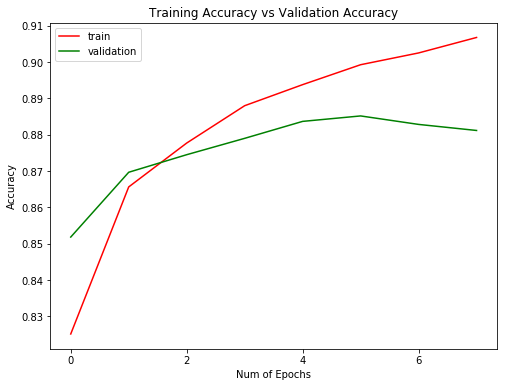

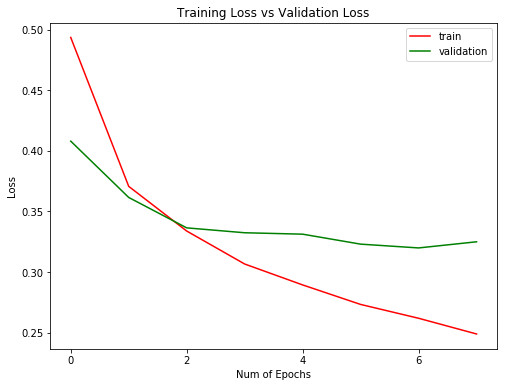

Run 3: Nodes = 430
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 176us/step - loss: 0.4875 - acc: 0.8270 - val_loss: 0.3995 - val_acc: 0.8543
Epoch 2/10
54000/54000 [==============================] - 7s 134us/step - loss: 0.3644 - acc: 0.8671 - val_loss: 0.3594 - val_acc: 0.8690
Epoch 3/10
54000/54000 [==============================] - 7s 135us/step - loss: 0.3289 - acc: 0.8789 - val_loss: 0.3625 - val_acc: 0.8643


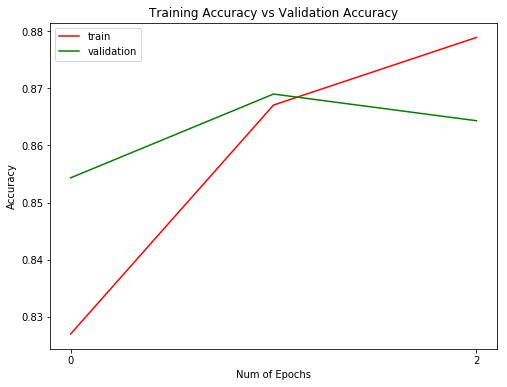

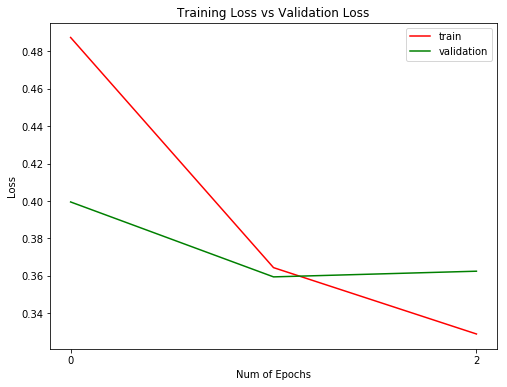

Run 4: Nodes = 606
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 183us/step - loss: 0.4832 - acc: 0.8280 - val_loss: 0.3807 - val_acc: 0.8583
Epoch 2/10
54000/54000 [==============================] - 9s 168us/step - loss: 0.3647 - acc: 0.8662 - val_loss: 0.3532 - val_acc: 0.8722
Epoch 3/10
54000/54000 [==============================] - 9s 167us/step - loss: 0.3270 - acc: 0.8804 - val_loss: 0.3466 - val_acc: 0.8713
Epoch 4/10
54000/54000 [==============================] - 9s 175us/step - loss: 0.3001 - acc: 0.8890 - val_loss: 0.3387 - val_acc: 0.8783
Epoch 5/10
54000/54000 [==============================] - 9s 169us/step - loss: 0.2803 - acc: 0.8951 - val_loss: 0.3365 - val_acc: 0.8778
Epoch 6/10
54000/54000 [==============================] - 9s 174us/step - loss: 0.2657 - acc: 0.9016 - val_loss: 0.3221 - val_acc: 0.8850
Epoch 7/10
54000/54000 [==============================] - 9s 17

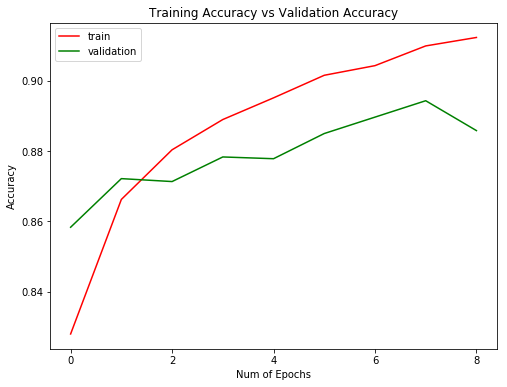

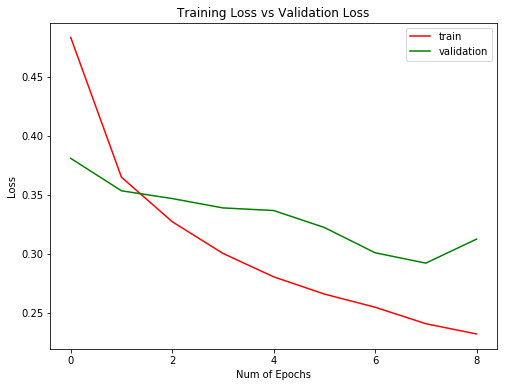

Run 5: Nodes = 784
---------------------------------------
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 255us/step - loss: 0.4811 - acc: 0.8276 - val_loss: 0.4148 - val_acc: 0.8442
Epoch 2/10
54000/54000 [==============================] - 14s 258us/step - loss: 0.3619 - acc: 0.8687 - val_loss: 0.3520 - val_acc: 0.8723
Epoch 3/10
54000/54000 [==============================] - 12s 230us/step - loss: 0.3228 - acc: 0.8818 - val_loss: 0.3550 - val_acc: 0.8672


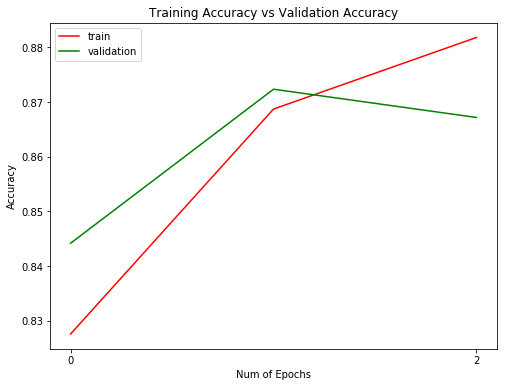

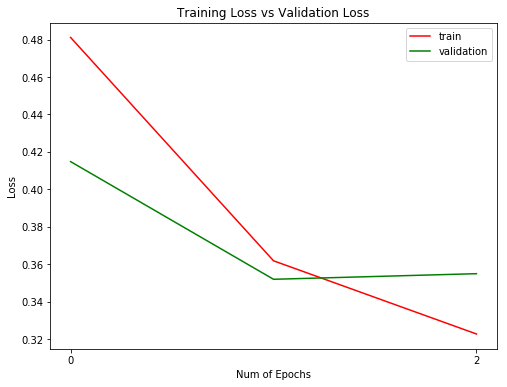

In [26]:
# Testing model with number of nodes in hidden layer from 78 to 784
list_nodes = [78, 254, 430, 606, 784]
i = 1

## setup an Early Stoping instance
callbacks = [EarlyStopping(monitor='val_loss', patience=0)]
for node in list_nodes:
    print("Run {0}: Nodes = {1}".format(i, node))
    print("---------------------------------------")
    model = Sequential()
    model.add(Dense(node, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(train_single_images, 
                        train_single_labels,
                        validation_data=(validation_single_images,validation_single_labels), 
                        epochs=10,
                        callbacks=callbacks)
    
    training_accuracy = history.history['acc']
    validation_accuracy = history.history['val_acc']
    training_error = history.history['loss']
    validation_error = history.history['val_loss']
    #  Draw a graph to compare train and validation accuracy through five epochs
    plt.figure(0)
    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
    plt.figure(1)
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
    plt.show()
    i=i+1 

# Experimenting with k-folds cross-validation

In [27]:
# Implement cross-validation
images_single = images_single.reshape(images.shape[0], num_pixels).astype('float32')
images_single = images_single/255
temp_labels = labels_single
labels_single = np_utils.to_categorical(labels_single)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_acc = []
cv_error = []
for train, test in kfold.split(images_single, temp_labels):
    # create model
    model = Sequential()
    model.add(Dense(784, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])
    # Fit the model
    model.fit(images_single[train], labels_single[train], epochs=10)
    # evaluate the model
    scores = model.evaluate(images_single[test], labels_single[test], verbose=0)
    print("-------------------------------------------------------")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cv_acc.append(scores[1] * 100)
    cv_error.append(100-scores[1] * 100)
    print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
    np.std(cv_acc)))
    print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
    np.std(cv_error)))
    scores = model.evaluate(test_images_single, test_labels_single, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

Epoch 1/10
48000/48000 [==============================] - 13s 261us/step - loss: 0.4902 - acc: 0.8257
Epoch 2/10
48000/48000 [==============================] - 10s 201us/step - loss: 0.3696 - acc: 0.8648
Epoch 3/10
48000/48000 [==============================] - 9s 198us/step - loss: 0.3319 - acc: 0.8775
Epoch 4/10
48000/48000 [==============================] - 10s 199us/step - loss: 0.3047 - acc: 0.88720s - loss: 0.3
Epoch 5/10
48000/48000 [==============================] - 10s 198us/step - loss: 0.2846 - acc: 0.8950
Epoch 6/10
48000/48000 [==============================] - 10s 202us/step - loss: 0.2706 - acc: 0.8992
Epoch 7/10
48000/48000 [==============================] - 10s 207us/step - loss: 0.2570 - acc: 0.9041
Epoch 8/10
48000/48000 [==============================] - 10s 204us/step - loss: 0.2433 - acc: 0.9092
Epoch 9/10
48000/48000 [==============================] - 10s 206us/step - loss: 0.2346 - acc: 0.9126
Epoch 10/10
48000/48000 [==============================] - 10s 202us/